# roadmap

1. data preprocessing
    1.1 preprocessing and eda
        eda for numerical values
    1.2 visualization
    
    drop null labels
    drop nulls
    drop outliers
2. feature engineering
    2.1 creating new features
    2.2 dropping useless features
3. imputation or no imputation
    3.1 mean imputation
    3.2 median imputation
    3.3 dropping nulls
4. sampling strategies
    4.1 undersampling
    4.2 resampling
    4.3 oversampling with smote
5. classifiers 
6. tuning


find delay reason distribution
find delay time distribution
relationship between delays and durations

eda for numerical values
distribution for all variables
is there any outlier
any duplicate

eda- histograms- visualizations - boxplots 
look at feature importance and remove the unimportants


classification
class weights
different classifiers
tuning

https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/introduction.html
https://shap.readthedocs.io/en/latest/index.html

https://docs.rapids.ai/api/cudf/stable/        
https://www.kaggle.com/rohanrao/tutorial-on-reading-large-datasets?scriptVersionId=49328159&cellId=14

https://towardsdatascience.com/wisdom-of-the-crowd-voting-classifier-bagging-pasting-random-forest-and-extra-trees-289ef991e723

    

drop
FLT_NO

categorical_str 
ACT_CUS_FLE Filo numarasıdır. FL-45X
FLEET Filo tipidir. TX750-30
FLEET_FAM Filo tipinin ait olduğu ailedir. TX620
FLEET_FAM_GRP Filo tipinin ait olduğu aile grubudur. TX650
FLEET_BODY_TYP Uçak gövde tipidir B1
FLT_TYP Uçuşun tipidir. TYP1
LEG_DEP_AP Kalkış bacağı hava limanıdır. IST
LEG_DEP_CNTRY_COD Kalkış istasyonunun ülke kodudur. TR
LEG_DEP_RGN_COD Kalkış istasyonunun bölge bilgisidir. DO
LEG_ARR_AP Varış bacağı hava limanıdır. MAA
LEG_ARR_CNTRY_COD Varış istasyonunun ülke kodudur. IN
LEG_ARR_RGN_COD Varış istasyonunun bölge bilgisidir. FE

LEG_DEP_GMT_DT GMT saat türünden kalkış tarihi 
LEG_DEP_GMT_TM GMT saat türünden kalkış saat 
LEG_ARR_GMT_DT GMT saat türünden varış tarihi 
LEG_ARR_GMT_TM GMT saat türünden varış saat 
- calculate flight duration


DELAY1_SUB_CODE Uçuşta yaşanan tehirin ilk nedeninin kodu 64D
DELAY2_SUB_CODE Varsa uçuşta yaşanan tehirin ikinci  nedeninin kodu 31P
DELAY3_SUB_CODE Varsa uçuşta yaşanan tehirin üçüncü nedeninin kodu N/A
DELAY4_SUB_CODE Varsa uçuşta yaşanan tehirin ilk dördüncü kodu N/A

DELAY1_DURATION Uçuşta yaşanan tehirin birinci nedeninin süresi (dk) 107
DELAY2_DURATION Varsa uçuşta yaşanan tehirin ikinci nedeninin süresi (dk) 25
DELAY3_DURATION Varsa uçuşta yaşanan tehirin üçüncü nedeninin süresi (dk) 0
DELAY4_DURATION Varsa uçuşta yaşanan tehirin dördüncü nedeninin süresi (dk) 0
TOT_DELAY_DURATION Uçuşta yaşanan tehirin toplam süresi (dk) 132

DELAY_ROOT_ARR_AP Tehire sebep olduğu tespit edilen varış istasyonu KAN
DELAY_ROOT_DEP_AP Tehire sebep olduğu tespit edilen kalkış istasyonu IST

In [6]:
from pandas_profiling import ProfileReport
import pandas as pd

In [7]:
df = pd.read_excel(r'C:\Users\IsmailKaraman\workspace\thy\data\p3\CARGO_FOTP_DATASET.xlsx')
df.head(2)

FLT_NO ACT_CUS_FLE     FLEET FLEET_FAM FLEET_FAM_GRP FLEET_BODY_TYP  \
0  FL7064      FL-45X  TX750-30     TX750         TX750             B1   
1  FL7064      FL-45X  TX750-30     TX750         TX750             B1   

  FLT_TYP LEG_DEP_AP  LEG_DEP_GMT_DT  LEG_DEP_GMT_TM  ... DELAY2_SUB_CODE  \
0    TYP1        IST        20210509            1205  ...             NaN   
1    TYP1        IST        20210512            1526  ...             NaN   

  DELAY3_SUB_CODE DELAY4_SUB_CODE  DELAY_ROOT_ARR_AP  DELAY_ROOT_DEP_AP  \
0             NaN             NaN                  ?                  ?   
1             NaN             NaN                  ?                  ?   

  DELAY1_DURATION DELAY2_DURATION DELAY3_DURATION DELAY4_DURATION  \
0               0               0               0               0   
1               0               0               0               0   

  TOT_DELAY_DURATION  
0                  0  
1                  0  

[2 rows x 28 columns]

In [8]:
df.shape

(99546, 28)

In [9]:
%%script False
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/41 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

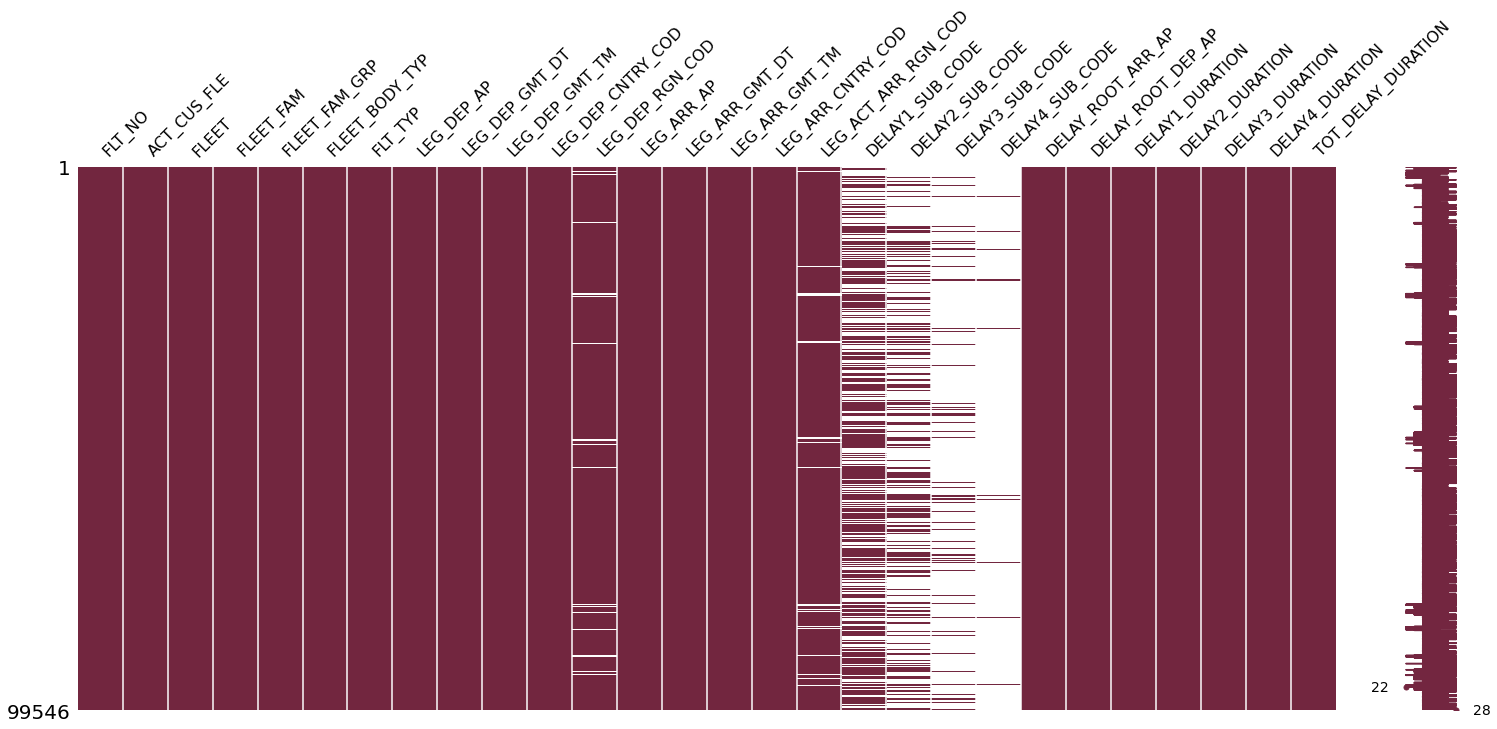

In [11]:
import missingno as msgn
#read in data here
msgn.matrix(df, color=(0.45, 0.15, 0.25))

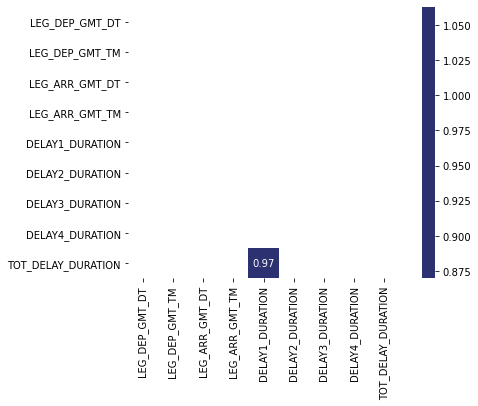

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

matrix = df.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(8, 5))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='crest')

plt.show();

interval columns not set, guessing: ['LEG_DEP_GMT_DT', 'LEG_DEP_GMT_TM', 'LEG_ARR_GMT_DT', 'LEG_ARR_GMT_TM', 'DELAY1_DURATION', 'DELAY2_DURATION', 'DELAY3_DURATION', 'DELAY4_DURATION', 'TOT_DELAY_DURATION']


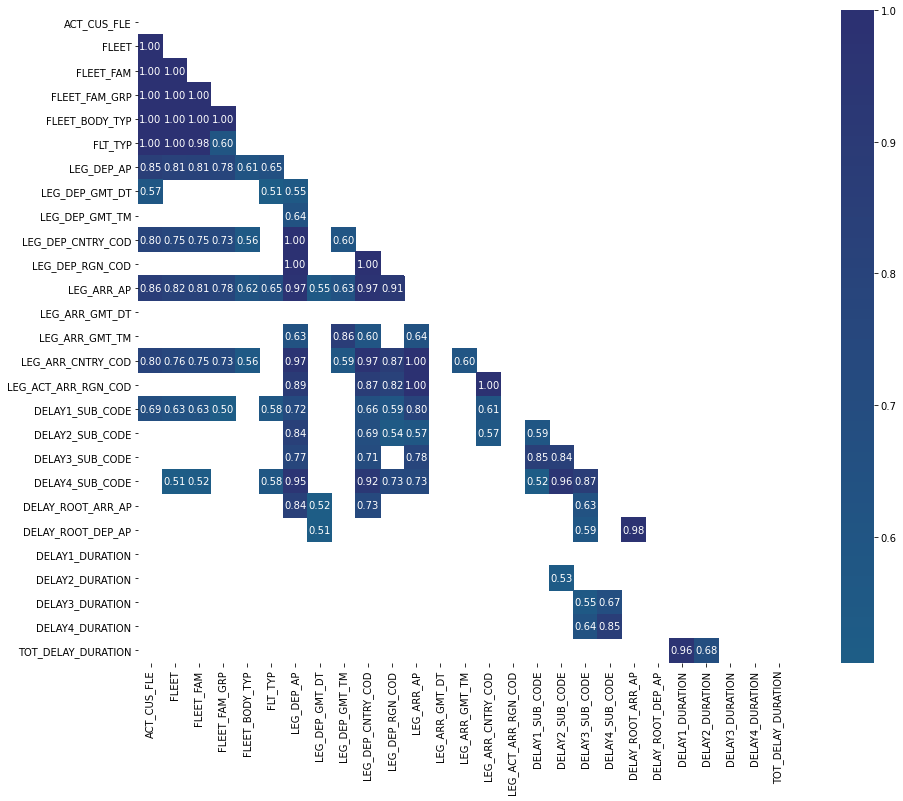

In [23]:
from phik.report import plot_correlation_matrix
from phik import report

phik_overview = df.drop('FLT_NO', axis=1).phik_matrix()

matrix = phik_overview.abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(18, 12))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='crest')

plt.show();

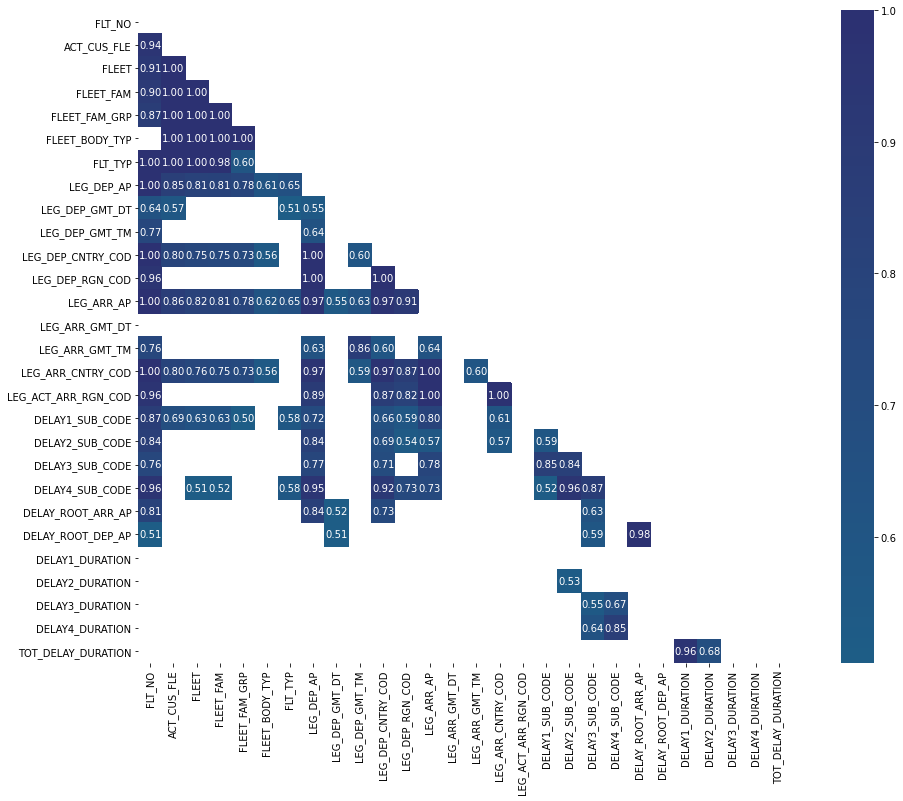

### drop duplicates

In [9]:
tmp_df = merged_df.copy()
tmp_df['values_nolabel']  = merged_df.drop(['FLIGHT_REASON'], axis=1).applymap(str).apply(' '.join, axis=1)
tmp_df['values_label']  = merged_df.applymap(str).apply(' '.join, axis=1)

In [10]:
no_label = tmp_df[tmp_df.duplicated(subset=['values_nolabel'])].index
with_label = tmp_df[tmp_df.duplicated(subset=['values_label'])].index

In [11]:
conflicts_indexes = merged_df.loc[list(set(no_label).difference(set(with_label)))].index
conflicts_indexes

Int64Index([1201984, 566526, 1110212, 1226264, 807898, 1247613, 1260318], dtype='int64')

In [12]:
all_conflict_indexes = []
for ind in conflicts_indexes:
    print(tmp_df[tmp_df['values_nolabel'] == tmp_df.loc[ind, 'values_nolabel']]['FLIGHT_REASON'])
    all_conflict_indexes.extend(list(tmp_df[tmp_df['values_nolabel'] == tmp_df.loc[ind, 'values_nolabel']].index))
    print('---')

898909      LEISURE
1201984    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
343385     LEISURE
566526    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
343581     BUSINESS
343703     BUSINESS
1110212     LEISURE
Name: FLIGHT_REASON, dtype: object
---
980116      LEISURE
1226264    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
638445     LEISURE
807898    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
357281         LEISURE
357282         LEISURE
1247613    SECOND HOME
Name: FLIGHT_REASON, dtype: object
---
868592      LEISURE
1260318    BUSINESS
Name: FLIGHT_REASON, dtype: object
---


In [13]:
merged_df.drop(conflicts_indexes, inplace=True)

In [14]:
merged_df.drop_duplicates(inplace=True)

In [15]:
merged_df.shape

(953652, 37)

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### correlation

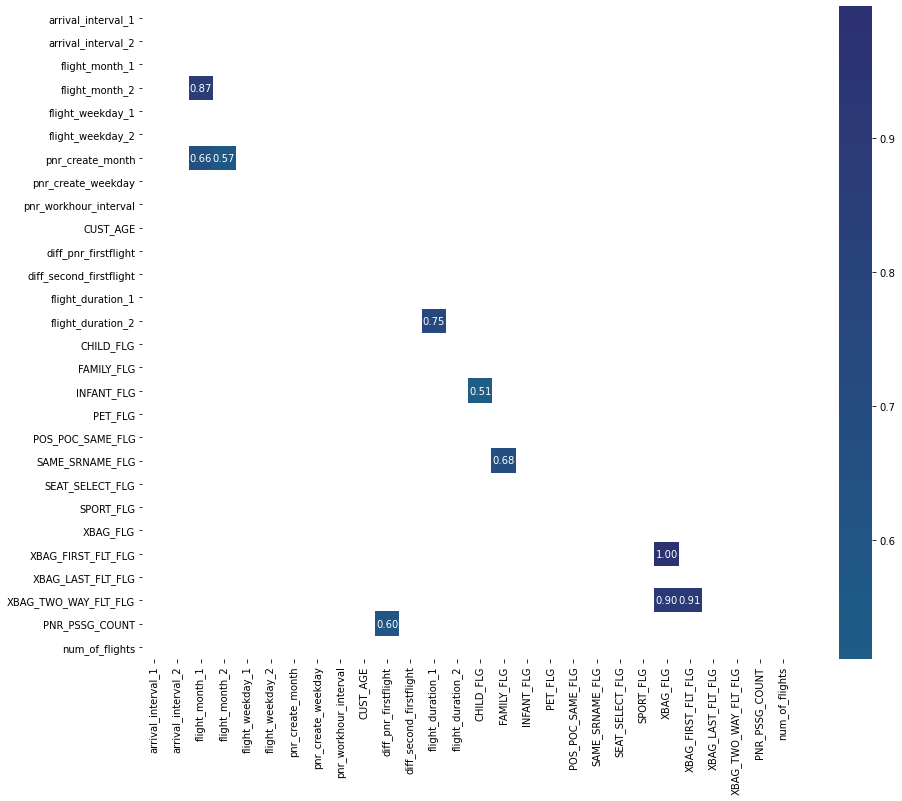

In [17]:
matrix = merged_df.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(16, 12))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='crest')

plt.show();

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [18]:
# dropping 'XBAG_FLG' because high correlation
merged_df.drop(['XBAG_FLG'], axis=1, inplace=True)
passthrough.remove('XBAG_FLG')

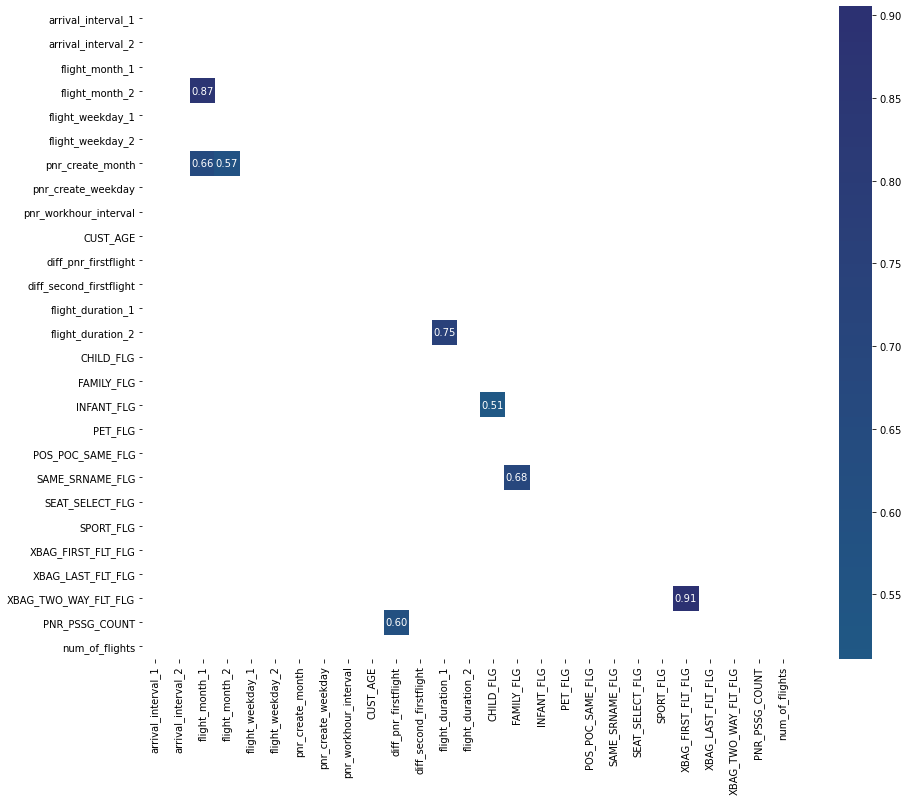

In [19]:
matrix = merged_df.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(16, 12))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='crest')

plt.show();

In [20]:
merged_df.columns

Index(['ARR', 'DEP', 'ID_PNR_ITI_CABCLASS_1', 'ID_PNR_ITI_CABCLASS_2',
       'ID_PNR_ITI_SELCLASS_1', 'ID_PNR_ITI_SELCLASS_2', 'JRNY_TYP', 'NTNLT1',
       'arrival_interval_1', 'arrival_interval_2', 'flight_month_1',
       'flight_month_2', 'flight_weekday_1', 'flight_weekday_2',
       'pnr_create_month', 'pnr_create_weekday', 'pnr_workhour_interval',
       'CUST_AGE', 'diff_pnr_firstflight', 'diff_second_firstflight',
       'flight_duration_1', 'flight_duration_2', 'CHILD_FLG', 'FAMILY_FLG',
       'INFANT_FLG', 'PET_FLG', 'POS_POC_SAME_FLG', 'SAME_SRNAME_FLG',
       'SEAT_SELECT_FLG', 'SPORT_FLG', 'XBAG_FIRST_FLT_FLG',
       'XBAG_LAST_FLT_FLG', 'XBAG_TWO_WAY_FLT_FLG', 'PNR_PSSG_COUNT',
       'num_of_flights', 'FLIGHT_REASON'],
      dtype='object')

### visualizations

<AxesSubplot:xlabel='DEP', ylabel='Count'>

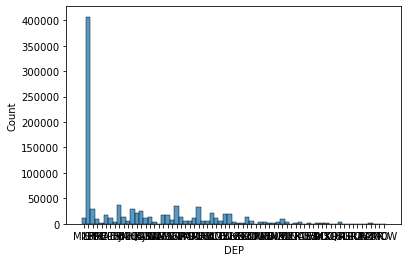

In [21]:
sns.histplot(data=merged_df, x="DEP", )

## eda for numerical features

In [22]:
import statsmodels.api as sm
import pylab as py

In [23]:
numerical

['CUST_AGE',
 'diff_pnr_firstflight',
 'diff_second_firstflight',
 'flight_duration_1',
 'flight_duration_2']

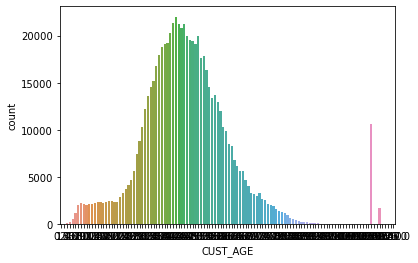

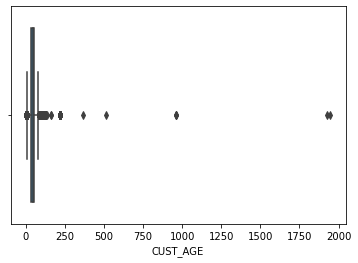

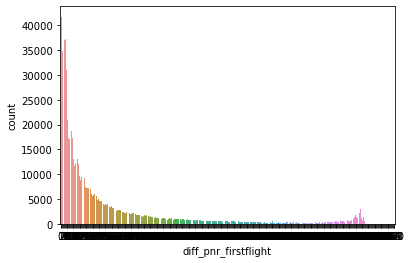

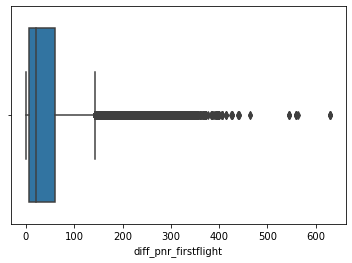

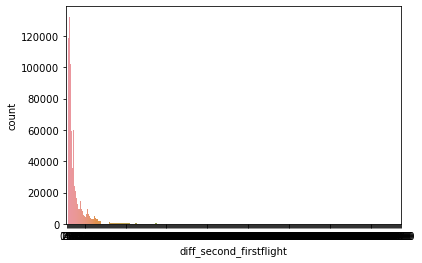

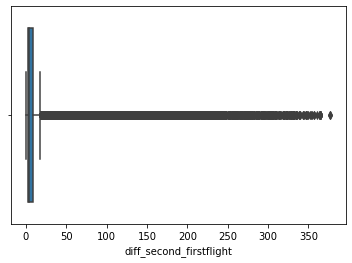

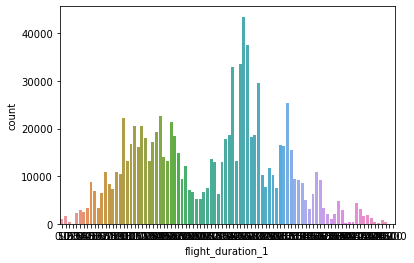

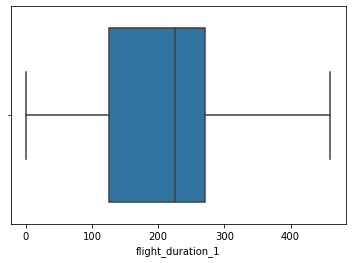

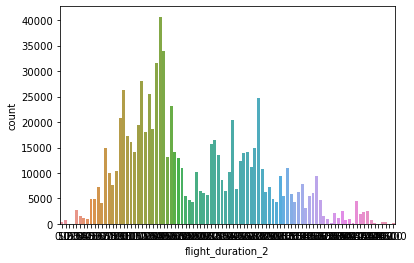

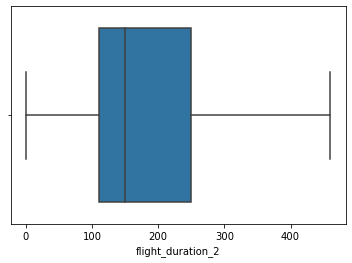

In [24]:
for i, col in enumerate(numerical):

    plt.figure(2*i)
    sns.countplot(x=col, data=merged_df)

    plt.figure(2*i+1)
    sns.boxplot(x=col, data=merged_df)


In [25]:
merged_df[merged_df['CUST_AGE']>120]['CUST_AGE']

14         121.0
56         121.0
130        121.0
258        221.0
569        121.0
           ...  
1293967    121.0
1294110    221.0
1294157    221.0
1294242    121.0
1295218    221.0
Name: CUST_AGE, Length: 12364, dtype: float64

In [26]:
merged_df[merged_df['diff_pnr_firstflight']>365]['diff_pnr_firstflight']

51830      405
51852      405
77749      396
123998     389
189386     559
          ... 
1212413    369
1212682    369
1221615    399
1221616    399
1248279    387
Name: diff_pnr_firstflight, Length: 125, dtype: int64

In [27]:
merged_df[merged_df['flight_duration_1']>400]['flight_duration_1']

2394       425.0
2781       420.0
2871       405.0
3428       410.0
3429       410.0
           ...  
1289388    415.0
1290932    410.0
1290952    405.0
1290955    405.0
1290971    425.0
Name: flight_duration_1, Length: 13823, dtype: float64

'CUST_AGE' : has some outliers like 121, 221, 367, 1947 etc. Rows that contain these outliers may be dropped, because there is plenty of data. We choose 120 as threshold because oldest living person in the world is 118. source(https://www.ntv.com.tr/dunya/guinnesse-gore-dunyanin-en-yasli-insani-kane-118-yasina-girdi,it-X28s4mkG3f5o3N-Zc5w)
'diff_pnr_firstflight': has values greater than 365. We choose 365 as threshold becasue when we try to buy a ticket, latest date we can buy is 365 days later.
'diff_second_firstflight': If we same logic for this feature, number of days between two flights cannot be greater than 365.
'flight_duration_1' : According tto graphs there is no outliers for flight durations.
'flight_duration_2' : According tto graphs there is no outliers for flight durations.

### eda for categorical variables

In [28]:
categorical_int

['arrival_interval_1',
 'arrival_interval_2',
 'flight_month_1',
 'flight_month_2',
 'flight_weekday_1',
 'flight_weekday_2',
 'pnr_create_month',
 'pnr_create_weekday',
 'pnr_workhour_interval']

array([[<AxesSubplot:title={'center':'arrival_interval_1'}>,
        <AxesSubplot:title={'center':'arrival_interval_2'}>,
        <AxesSubplot:title={'center':'flight_month_1'}>],
       [<AxesSubplot:title={'center':'flight_month_2'}>,
        <AxesSubplot:title={'center':'flight_weekday_1'}>,
        <AxesSubplot:title={'center':'flight_weekday_2'}>],
       [<AxesSubplot:title={'center':'pnr_create_month'}>,
        <AxesSubplot:title={'center':'pnr_create_weekday'}>,
        <AxesSubplot:title={'center':'pnr_workhour_interval'}>]],
      dtype=object)

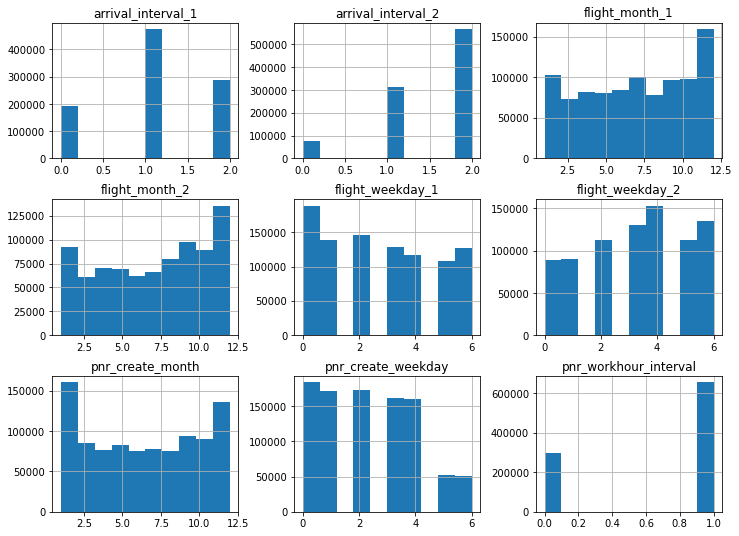

In [29]:
merged_df[categorical_int].hist(figsize=(12,9))

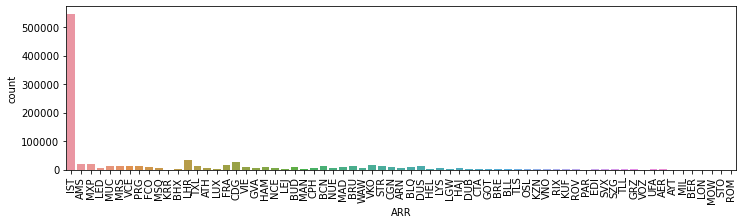

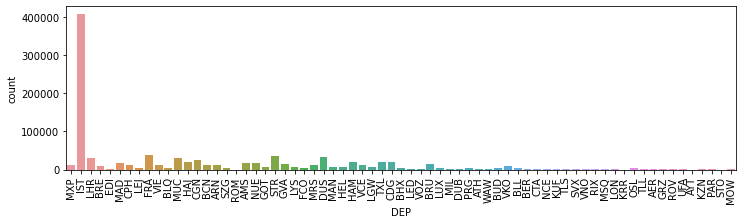

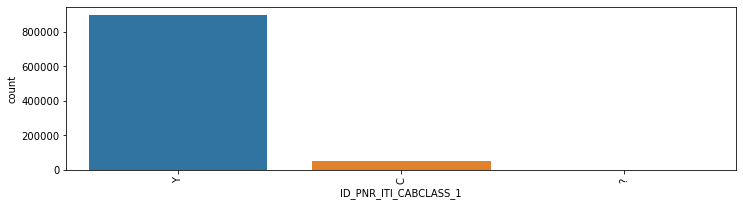

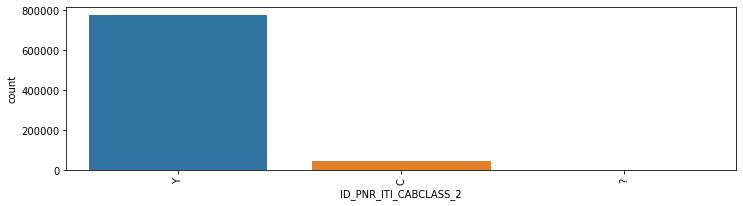

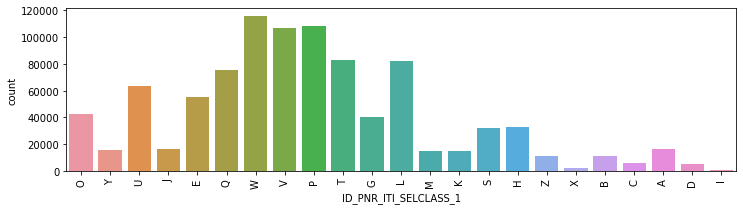

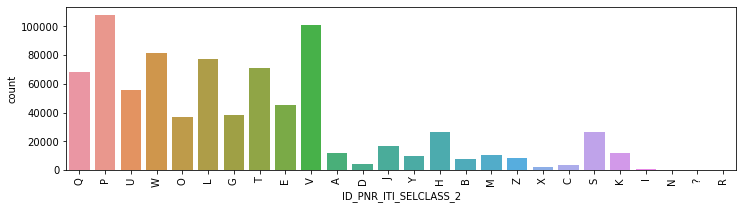

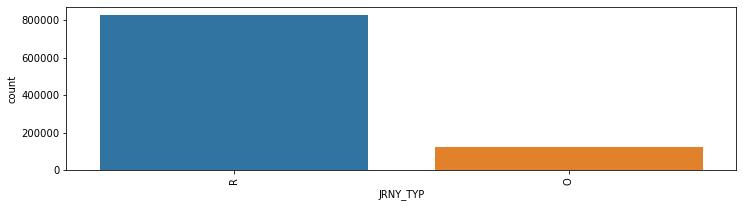

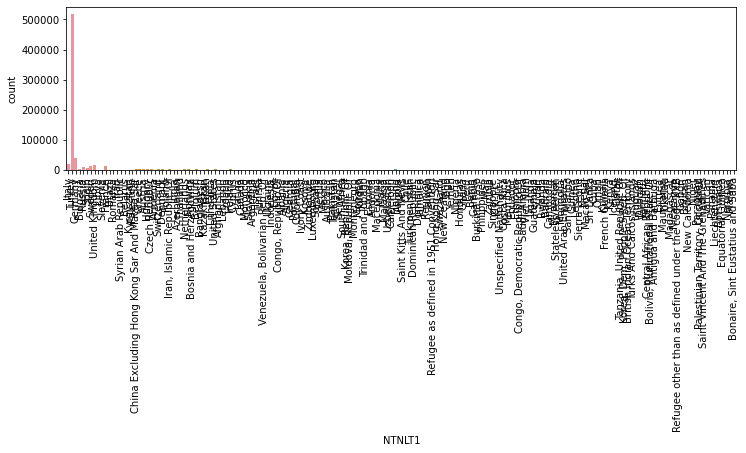

In [30]:
for i, col in enumerate(categorical_str):

    plt.figure(2*i, figsize=(12,3))
    ax = sns.countplot(x=col, data=merged_df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

[Text(0, 0, 'Italy'),
 Text(1, 0, 'Turkey'),
 Text(2, 0, 'Germany'),
 Text(3, 0, 'Bulgaria'),
 Text(4, 0, 'Russia'),
 Text(5, 0, 'Spain'),
 Text(6, 0, 'Sweden'),
 Text(7, 0, 'United Kingdom'),
 Text(8, 0, 'Libya'),
 Text(9, 0, 'Slovenia'),
 Text(10, 0, 'France'),
 Text(11, 0, 'Brazil'),
 Text(12, 0, 'Romania'),
 Text(13, 0, 'Iraq'),
 Text(14, 0, 'Syrian Arab Republic'),
 Text(15, 0, 'Belarus'),
 Text(16, 0, 'Kyrgyzstan'),
 Text(17, 0, 'Palestine'),
 Text(18, 0, 'China Excluding Hong Kong Sar And Macao Sar'),
 Text(19, 0, 'Greece'),
 Text(20, 0, 'Austria'),
 Text(21, 0, 'Hungary'),
 Text(22, 0, 'Czech Republic'),
 Text(23, 0, 'Armenia'),
 Text(24, 0, 'Switzerland'),
 Text(25, 0, 'Denmark'),
 Text(26, 0, 'Poland'),
 Text(27, 0, 'Iran, Islamic Republic Of'),
 Text(28, 0, 'India'),
 Text(29, 0, 'Azerbaijan'),
 Text(30, 0, 'Thailand'),
 Text(31, 0, 'Netherlands'),
 Text(32, 0, 'Norway'),
 Text(33, 0, 'Bosnia and Herzegovina'),
 Text(34, 0, 'Belgium'),
 Text(35, 0, 'Bangladesh'),
 Text(36, 0

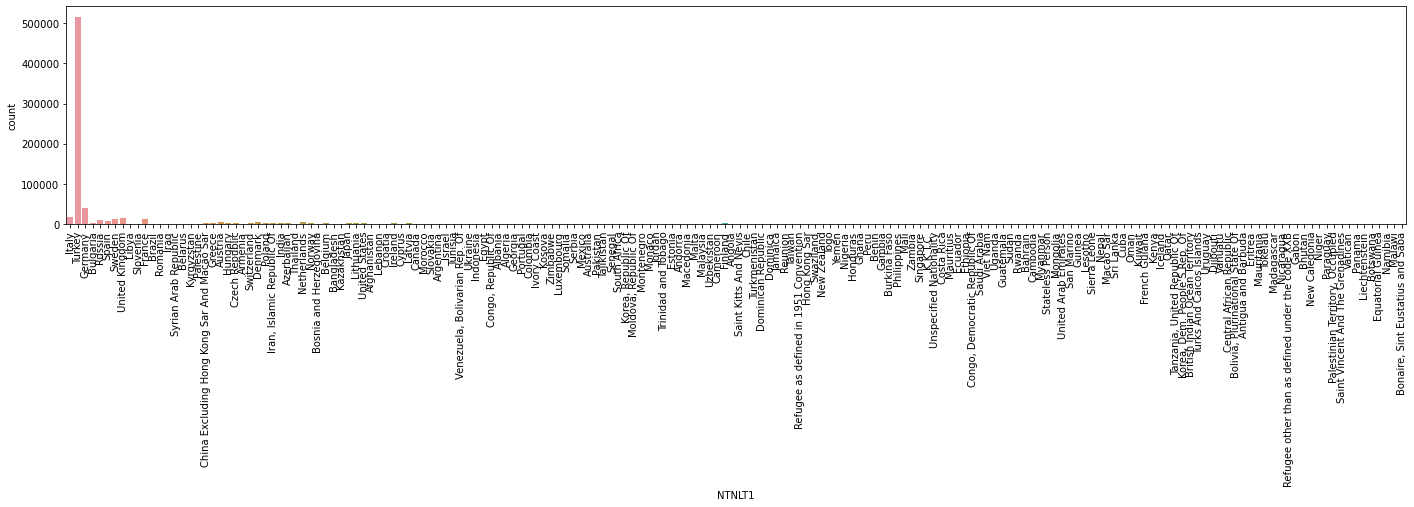

In [31]:
plt.figure(1, figsize=(24,4))
ax = sns.countplot(x='NTNLT1', data=merged_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [32]:
merged_df['NTNLT1'].value_counts()[:10]

Turkey            516427
Germany            39042
Italy              17771
United Kingdom     14999
France             12911
Sweden             11247
Russia              9191
Spain               5923
Netherlands         4176
Austria             3684
Name: NTNLT1, dtype: int64

### arranging dataframe

In [33]:
# removing outliers
merged_df = merged_df[merged_df['CUST_AGE']<100]
merged_df = merged_df[merged_df['diff_pnr_firstflight']<365]
merged_df = merged_df[merged_df['diff_second_firstflight']<365]

In [34]:
merged_df.shape

(588615, 36)

In [35]:
merged_df['FLIGHT_REASON'].value_counts()

BUSINESS       259251
SECOND HOME    180461
LEISURE        148173
STUDENT           730
Name: FLIGHT_REASON, dtype: int64

## feature importance

In [36]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

NameError: name 'shap' is not defined

In [ ]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
y = merged_df['FLIGHT_REASON']
X = merged_df[categorical_str+categorical_int+numerical+passthrough]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X.isna().sum()[X.isna().sum()>0]

In [ ]:
X[numerical].info()

In [ ]:
merged_df['ID_PNR_ITI_SELCLASS_2'].unique() 

In [ ]:
(X[numerical]==-1).index

In [ ]:
cw = dict(zip(np.unique(y), compute_class_weight('balanced', np.unique(y), y)))

In [ ]:
y.value_counts()

## undersampling

#### equalizing sample sizes

In [ ]:
num_sample = y[y=='STUDENT'].shape[0]
index_1 = y[y=='BUSINESS'].sample(num_sample, random_state=1).index
index_2 = y[y=='LEISURE'].sample(num_sample, random_state=1).index
index_3 = y[y=='SECOND HOME'].sample(num_sample, random_state=1).index
index_4 = y[y=='STUDENT'].index

In [ ]:
all_indexes = list(index_1) + list(index_2) + list(index_3) + list(index_4)
len(all_indexes)

In [ ]:
X = X.loc[all_indexes]
y = y[all_indexes]

In [ ]:
y.value_counts()

In [ ]:
cw = dict(zip(np.unique(y), compute_class_weight('balanced', np.unique(y), y)))

In [ ]:
%%time
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_str_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

categorical_int_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
                                transformers=[
                                              ('num', numeric_transformer, numerical),
                                              ('cat_str', categorical_str_transformer, categorical_str),
                                              ('cat_int', categorical_int_transformer, categorical_int),], 
                                remainder='passthrough')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight=cw, n_jobs=-1))])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

clf.fit(X_train, y_train)
print("training score: %.3f" % clf.score(X_train, y_train))
print("test score: %.3f" % clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
clf['preprocessor'].transform(X_train).toarray()

In [ ]:
clf['classifier'].pre

In [ ]:
import shap
shap_values = shap.Explainer(clf['classifier']).shap_values(clf['preprocessor'].transform(X_train).toarray())
shap.summary_plot(shap_values, X_train, plot_type="bar")

#### using different sample sizes based on f1-scores

In [ ]:
y = merged_df['FLIGHT_REASON']
X = merged_df[categorical_str+categorical_int+numerical+passthrough]

In [ ]:
num_sample = y[y=='STUDENT'].shape[0]
index_1 = y[y=='BUSINESS'].sample(2*num_sample).index
index_2 = y[y=='LEISURE'].sample(3*num_sample).index
index_3 = y[y=='SECOND HOME'].sample(2*num_sample).index
index_4 = y[y=='STUDENT'].index

In [ ]:
all_indexes = list(index_1) + list(index_2) + list(index_3) + list(index_4)
len(all_indexes)

In [ ]:
X = X.loc[all_indexes]
y = y[all_indexes]

In [ ]:
cw = dict(zip(np.unique(y), compute_class_weight('balanced', np.unique(y), y)))

In [ ]:
y.value_counts()

In [ ]:
%%time
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_str_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

categorical_int_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
                                transformers=[
                                              ('num', numeric_transformer, numerical),
                                              ('cat_str', categorical_str_transformer, categorical_str),
                                              ('cat_int', categorical_int_transformer, categorical_int),], 
                                remainder='passthrough')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight=cw, n_jobs=-1))])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

clf.fit(X_train, y_train)
print("training score: %.3f" % clf.score(X_train, y_train))
print("test score: %.3f" % clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
ss_

## smote

In [ ]:
y = merged_df['FLIGHT_REASON']
X = merged_df[categorical_str+categorical_int+numerical+passthrough]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from imblearn.over_sampling import SMOTENC

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_str_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

categorical_int_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
                                transformers=[
                                              ('num', numeric_transformer, numerical),
                                              ('cat_str', categorical_str_transformer, categorical_str),
                                              ('cat_int', categorical_int_transformer, categorical_int),], 
                                remainder='passthrough')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
smote = SMOTENC(random_state=42, categorical_features=range(5,X_train.shape[1]), 
                                              sampling_strategy='minority', n_jobs=-1)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

In [ ]:
cw = dict(zip(np.unique(y), compute_class_weight('balanced', np.unique(y), y)))

In [ ]:
clf = RandomForestClassifier(class_weight=cw, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("training score: %.3f" % clf.score(X_train, y_train))
print("test score: %.3f" % clf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
feature importance - shap
auto ml

# auto ml

In [ ]:
y = merged_df['FLIGHT_REASON']
X = merged_df[categorical_str+categorical_int+numerical+passthrough]

In [ ]:
num_sample = y[y=='STUDENT'].shape[0]
index_1 = y[y=='BUSINESS'].sample(num_sample, random_state=1).index
index_2 = y[y=='LEISURE'].sample(num_sample, random_state=1).index
index_3 = y[y=='SECOND HOME'].sample(num_sample, random_state=1).index
index_4 = y[y=='STUDENT'].index

In [ ]:
all_indexes = list(index_1) + list(index_2) + list(index_3) + list(index_4)
len(all_indexes)

In [ ]:
X = X.loc[all_indexes]
y = y[all_indexes]

In [ ]:
y.value_counts()

In [58]:
cw = dict(zip(np.unique(y), compute_class_weight('balanced', np.unique(y), y)))

In [59]:
def create_pipeline(clf_name, clf_object):
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_str_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

    categorical_int_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
                                    transformers=[
                                                  ('num', numeric_transformer, numerical),
                                                  ('cat_str', categorical_str_transformer, categorical_str),
                                                  ('cat_int', categorical_int_transformer, categorical_int),], 
                                    n_jobs = -1,
                                    transformer_weights = None,
                                    remainder='passthrough')

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          (clf_name, clf_object)],
                            verbose=False)
    return pipeline

In [60]:
import xgboost
import lightgbm
import sklearn
import time
from tqdm import tqdm
from sklearn.base import ClassifierMixin
from sklearn.utils.testing import all_estimators
from sklearn.metrics import average_precision_score, accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score

In [61]:
CLASSIFIERS = [est for est in all_estimators() if issubclass(est[1], ClassifierMixin)]
removed_classifiers = [
    ("CheckingClassifier", sklearn.utils._mocking.CheckingClassifier),
    ("ClassifierChain", sklearn.multioutput.ClassifierChain),
    ("ComplementNB", sklearn.naive_bayes.ComplementNB),
    ("GradientBoostingClassifier", sklearn.ensemble.gradient_boosting.GradientBoostingClassifier,),
    ("GaussianProcessClassifier", sklearn.gaussian_process.gpc.GaussianProcessClassifier,),
    ("HistGradientBoostingClassifier", sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,),
    ("MLPClassifier", sklearn.neural_network.multilayer_perceptron.MLPClassifier),
    ("LogisticRegressionCV", sklearn.linear_model.logistic.LogisticRegressionCV),
    ("MultiOutputClassifier", sklearn.multioutput.MultiOutputClassifier),
    ("MultinomialNB", sklearn.naive_bayes.MultinomialNB),
    ("OneVsOneClassifier", sklearn.multiclass.OneVsOneClassifier),
    ("OneVsRestClassifier", sklearn.multiclass.OneVsRestClassifier),
    ("OutputCodeClassifier", sklearn.multiclass.OutputCodeClassifier),
    ("RadiusNeighborsClassifier", sklearn.neighbors.classification.RadiusNeighborsClassifier,),
    ("VotingClassifier", sklearn.ensemble.voting.VotingClassifier),
]

for i in removed_classifiers:
    CLASSIFIERS.pop(CLASSIFIERS.index(i))
    
CLASSIFIERS.append(("XGBClassifier", xgboost.XGBClassifier))
CLASSIFIERS.append(("LGBMClassifier", lightgbm.LGBMClassifier))

In [62]:
from sklearn.model_selection import cross_validate

In [ ]:
random_state = 10
Accuracy_mean = []
Accuracy_std = []
F1_mean = []
F1_std = []
names = []
TIME = []
predictions = {}
models = {}

for name, model in tqdm(CLASSIFIERS):
    start = time.time()
    try:
        if "random_state" in model().get_params().keys():
            if "class_weight" in model().get_params().keys():
                pipeline = create_pipeline("classifier", model(random_state=random_state, class_weight=cw))
            else:
                pipeline = create_pipeline("classifier", model(random_state=random_state))
        else:
            if "class_weight" in model().get_params().keys():
                pipeline = create_pipeline("classifier", model(class_weight=cw))
            else:
                pipeline = create_pipeline("classifier", model())
                
                                   
        results = cross_validate(pipeline, X, y, cv=5, scoring=('f1_weighted', 'accuracy'),
                         return_estimator=True)
        # ['fit_time', 'score_time', 'estimator', 'test_f1', 'test_accuracy']
                                   
        names.append(name)
        Accuracy_mean.append(results['test_accuracy'].mean())
        Accuracy_std.append(results['test_accuracy'].std())
        F1_mean.append(results['test_f1_weighted'].mean())
        F1_std.append(results['test_f1_weighted'].std())
        TIME.append(results['fit_time'].mean())
    
    except Exception as exception:
        print(name + " model failed to execute")
        print(exception)
                                   
scores = pd.DataFrame(
    {   "Model": names,
        "Accuracy Mean": Accuracy_mean,
        "Accuracy Std": Accuracy_std,
        "F1-Score Mean": F1_mean,
        "F1-Score Std": F1_std,
        "Time Taken": TIME, })      

In [66]:
scores.sort_values(by='F1-Score Mean', ascending=False)

Model  Accuracy Mean  Accuracy Std  F1-Score Mean  \
26                  XGBClassifier       0.926370  7.503049e-03       0.926225   
27                 LGBMClassifier       0.925685  1.179396e-02       0.925490   
21         RandomForestClassifier       0.921918  1.451344e-02       0.921505   
1               BaggingClassifier       0.906849  1.189298e-02       0.906972   
8            ExtraTreesClassifier       0.903425  2.772915e-02       0.902171   
15             LogisticRegression       0.899658  9.722650e-03       0.899326   
3          CalibratedClassifierCV       0.897603  1.029678e-02       0.896962   
14                      LinearSVC       0.895890  1.068800e-02       0.895458   
25                            SVC       0.895205  2.341324e-02       0.894348   
18    PassiveAggressiveClassifier       0.886986  1.295046e-02       0.886318   
5          DecisionTreeClassifier       0.885959  1.545276e-02       0.885851   
24                  SGDClassifier       0.885959  1.630223e-02       0.885623   
19                     Perceptron       0.880822  1.491201e-02       0.880046   
23              RidgeClassifierCV       0.880822  1.920864e-02       0.879594   
22                RidgeClassifier       0.877397  1.439171e-02       0.876331   
10           KNeighborsClassifier       0.852055  7.627074e-03       0.849547   
17                          NuSVC       0.844521  3.191369e-02       0.839664   
2                     BernoulliNB       0.825685  2.749128e-02       0.823478   
0              AdaBoostClassifier       0.768493  3.733348e-02       0.766709   
7             ExtraTreeClassifier       0.716781  2.982796e-02       0.714906   
16                NearestCentroid       0.651370  3.768057e-02       0.616054   
6                 DummyClassifier       0.226027  2.775558e-17       0.226231   
4                   CategoricalNB            NaN           NaN            NaN   
9                      GaussianNB            NaN           NaN            NaN   
11               LabelPropagation            NaN           NaN            NaN   
12                 LabelSpreading            NaN           NaN            NaN   
13     LinearDiscriminantAnalysis            NaN           NaN            NaN   
20  QuadraticDiscriminantAnalysis            NaN           NaN            NaN   

    F1-Score Std  Time Taken  
26  7.475396e-03    0.247600  
27  1.172622e-02    0.427799  
21  1.472071e-02    0.549206  
1   1.156474e-02    0.259000  
8   2.919969e-02    0.662610  
15  9.616687e-03    0.127400  
3   1.009936e-02    0.436199  
14  1.051934e-02    0.121201  
25  2.336364e-02    0.244400  
18  1.277280e-02    0.036600  
5   1.543975e-02    0.046399  
24  1.602700e-02    0.043600  
19  1.453350e-02    0.032000  
23  1.966826e-02    0.122200  
22  1.462678e-02    0.054003  
10  8.153972e-03    0.021198  
17  3.411339e-02    0.622904  
2   2.873647e-02    0.023800  
0   3.775088e-02    0.222198  
7   3.202583e-02    0.028400  
16  5.437315e-02    0.021200  
6   2.775558e-17    0.019400  
4            NaN    0.019000  
9            NaN    0.020200  
11           NaN    0.019000  
12           NaN    0.019001  
13           NaN    0.018799  
20           NaN    0.019000

In [69]:
final_models = scores[(scores['F1-Score Mean']>0.9) & (scores['Time Taken']<1.0)].nlargest(3, 'F1-Score Mean')
final_models

Model  Accuracy Mean  Accuracy Std  F1-Score Mean  \
26           XGBClassifier       0.926370      0.007503       0.926225   
27          LGBMClassifier       0.925685      0.011794       0.925490   
21  RandomForestClassifier       0.921918      0.014513       0.921505   

    F1-Score Std  Time Taken  
26      0.007475    0.247600  
27      0.011726    0.427799  
21      0.014721    0.549206

In [70]:
final_models.Model.values

array(['XGBClassifier', 'LGBMClassifier', 'RandomForestClassifier'],
      dtype=object)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [188]:
classifier_objects = {
    'RandomForestClassifier' : RandomForestClassifier(random_state=0),
    'LGBMClassifier' : LGBMClassifier(random_state=0),
    'XGBClassifier' : XGBClassifier(random_state=0)
}

In [189]:
params_list = {
'RandomForestClassifier' : {'bootstrap': [True, False], 'max_depth': [10, 20, 30, 50, 100, 200, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 3, 5,10], 'min_samples_split': [2, 3, 5, 7, 10], 'n_estimators': [200, 300, 500, 1000, 2000]},
'LGBMClassifier' : {'max_depth': [10, 15, 20], 'learning_rate': [0.01, 0.1,1], 'feature_fraction': [0.5, 0.9], 'bagging_fraction': [0.5, 0.8, 0.9, 0.95], 'bagging_freq': [5, 8, 10, 20],'lambda_l1': [0, 0.01, 0.1],'lambda_l2': [0, 0.1, 1],'cat_smooth': [1, 2, 5]},
'XGBClassifier' : {'max_depth': [5, 7, 10, 15, 20], 'learning_rate': [0.01], 'n_estimators': [500], 'min_child_weight': [0, 2, 3, 5], 'max_delta_step': [0, 0.5, 1], 'subsample': [0.6, 0.9], 'colsample_bytree': [0.5, 0.9], 'reg_alpha': [0, 0.5, 1], 'reg_lambda': [0.2,  0.5, 1], 'scale_pos_weight': [0.2, 0.5, 1]},
}

In [190]:
def prepare_param_grid(params):
    
    param_grid = {}
    for key, value in params.items():
        new_key = 'classifier__' + key 
        param_grid[new_key] = value
    return param_grid

In [191]:
def grid_search(classifier, clf):
    
    param_grid = prepare_param_grid(params_list[clf])
    grid_search = GridSearchCV(classifier, param_grid=param_grid, cv = 5, scoring='f1_weighted', verbose = -1,  n_jobs = -1)
    grid_search.fit(X_train, y_train)
    gs_preds = grid_search.predict(X_test)
    
    return gs_preds, grid_search.best_params_

In [192]:
y_test.unique()

array(['STUDENT', 'LEISURE', 'BUSINESS', 'SECOND HOME'], dtype=object)

In [ ]:
k=0
results = pd.DataFrame(columns=['Model', 'acc_score', 'best_params', 'F1-score',  'clf_report'])

for model in final_models.Model.values:
    
    k+=1
    try:
        pipeline = create_pipeline("classifier", classifier_objects[model])
        preds, best_params = grid_search(pipeline, model)
    except:
        print('an error with', model)
        continue
    f1_s = f1_score(y_test, preds, average='weighted')
    acc_score = accuracy_score(y_test, preds)
    clf_report = classification_report(y_test, preds)
    
    results = results.append(pd.DataFrame({'Model':model,'acc_score':[acc_score], 'best_params':str(best_params),'F1-score':f1_s,'clf_report':clf_report}, index=[k]))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2528 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 3464 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 4544 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 5768 tasks      | elapsed: 20.0min


In [ ]:
results

In [ ]:
stopp

In [ ]:
without class weights:
              precision    recall  f1-score   support

    BUSINESS       0.97      0.99      0.98    151336
     LEISURE       0.98      0.97      0.97    190324
 SECOND HOME       0.98      0.97      0.98     85474
     STUDENT       0.99      0.42      0.59       405

    accuracy                           0.98    427539
   macro avg       0.98      0.84      0.88    427539
weighted avg       0.98      0.98      0.98    427539

In [ ]:
merged_df.diff_pnr_firstflight

In [ ]:
new features
if we can use additional datasets
is NTNLT1 in arr or dep of oene of the flights 

In [ ]:
is it possible to flight before pnr

pnrs[pnrs['diff_pnr_firstflight']<0][['ID_PNR_ITI_DEP_YMD_1', 'ID_PNR_CREATION_DTIME_GMT', 'diff_pnr_firstflight']]

2. uçuşun 1. uçuştan önce olması mümkün mü?
pnrs[pnrs['diff_second_firstflight']==2][['ID_PNR_ITI_DEP_YMD_2', 'ID_PNR_ITI_DEP_YMD_1', 'diff_second_firstflight']]
